# Proyecto UD3
#### UD3. Aprendizaxe Non Supervisada
#### MP. Sistemas de Aprendizaxe Automáticos
#### IES de Teis (Vigo), Vanesa Resúa Eiras, Cristina Gómez Alonso

Entrega en el moodle el fichero notebook solución así como un pdf generado con el contenido del notebook y su ejecución.

### Dataset: Países

Nuestro gallego de oro, Amancio Ortega, ha cumplido 87 años y le da vueltas a cuál será su legado en este mundo.
Es por ello, que ha contactado con el IES de Teis para que le ayudemos a identicar aquellos países más necesitados teniendo en cuenta factores socio-económicos y de salud para determinar el estado de cada país.
Una vez categorizados, la Fundación Ortega podrá abrir hospitales, escuelas y comedores sociales en dichos países.

Disponemos de un dataset con la información mundial de 166 países.

Lista de atributos para cada país:

* país: nombre del país
* mort_inf: número de niños menores de 5 años muertos por cada 1000 nacimientos
* exportaciones: exportaciones de bienes y servicios per cápita. Expresado como % del PIB per cápita
* salud: gasto total en salud per cápita. Expresado como % del PIB per cápita
* importaciones: importaciones de bienes y servicios per cápita. Expresado como % del PIB per cápita
* ingresos: ingresos netos por persona
* inflacion: la medida de la tasa de crecimiento anual del PIB total
* esp_vida: La cantidad promedio de años que viviría un niño recién nacido si los patrones de mortalidad actuales se mantuvieran iguales
* num_hijos: el número de hijos que nacerían de cada mujer si las tasas actuales de fecundidad por edad se mantuvieran iguales.
* pib: el PIB per cápita. Calculado como el PIB total dividido por la población total.

A Amancio no le interesan mucho los números ni las gráficas, sino que le extraigas conclusiones de cada uno de los pasos qué realizas y porqué los realizas.

## 1. Importación del dataset

In [2]:
import pandas as pd
df = pd.read_csv('paises.csv')
df

,pais,mort_inf,exportaciones,salud,importaciones,ingresos,inflacion,esp_vida,num_hijos,pib
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mort_inf,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exportaciones,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
salud,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
importaciones,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
ingresos,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflacion,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
esp_vida,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
num_hijos,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
pib,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


In [10]:
# Verificar si hay nulos
df.isnull().sum()

pais             0
mort_inf         0
exportaciones    0
salud            0
importaciones    0
ingresos         0
inflacion        0
esp_vida         0
num_hijos        0
pib              0
dtype: int64

## 2. EDA & Preprocessing

In [12]:
# Tamaño del dataset
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

El dataset tiene 167 filas y 10 columnas.


In [13]:
# Tipos de datos de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pais           167 non-null    object 
 1   mort_inf       167 non-null    float64
 2   exportaciones  167 non-null    float64
 3   salud          167 non-null    float64
 4   importaciones  167 non-null    float64
 5   ingresos       167 non-null    int64  
 6   inflacion      167 non-null    float64
 7   esp_vida       167 non-null    float64
 8   num_hijos      167 non-null    float64
 9   pib            167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [14]:
# Verificar si hay duplicados
df.duplicated().sum()

0

### 2.1 Gráficos

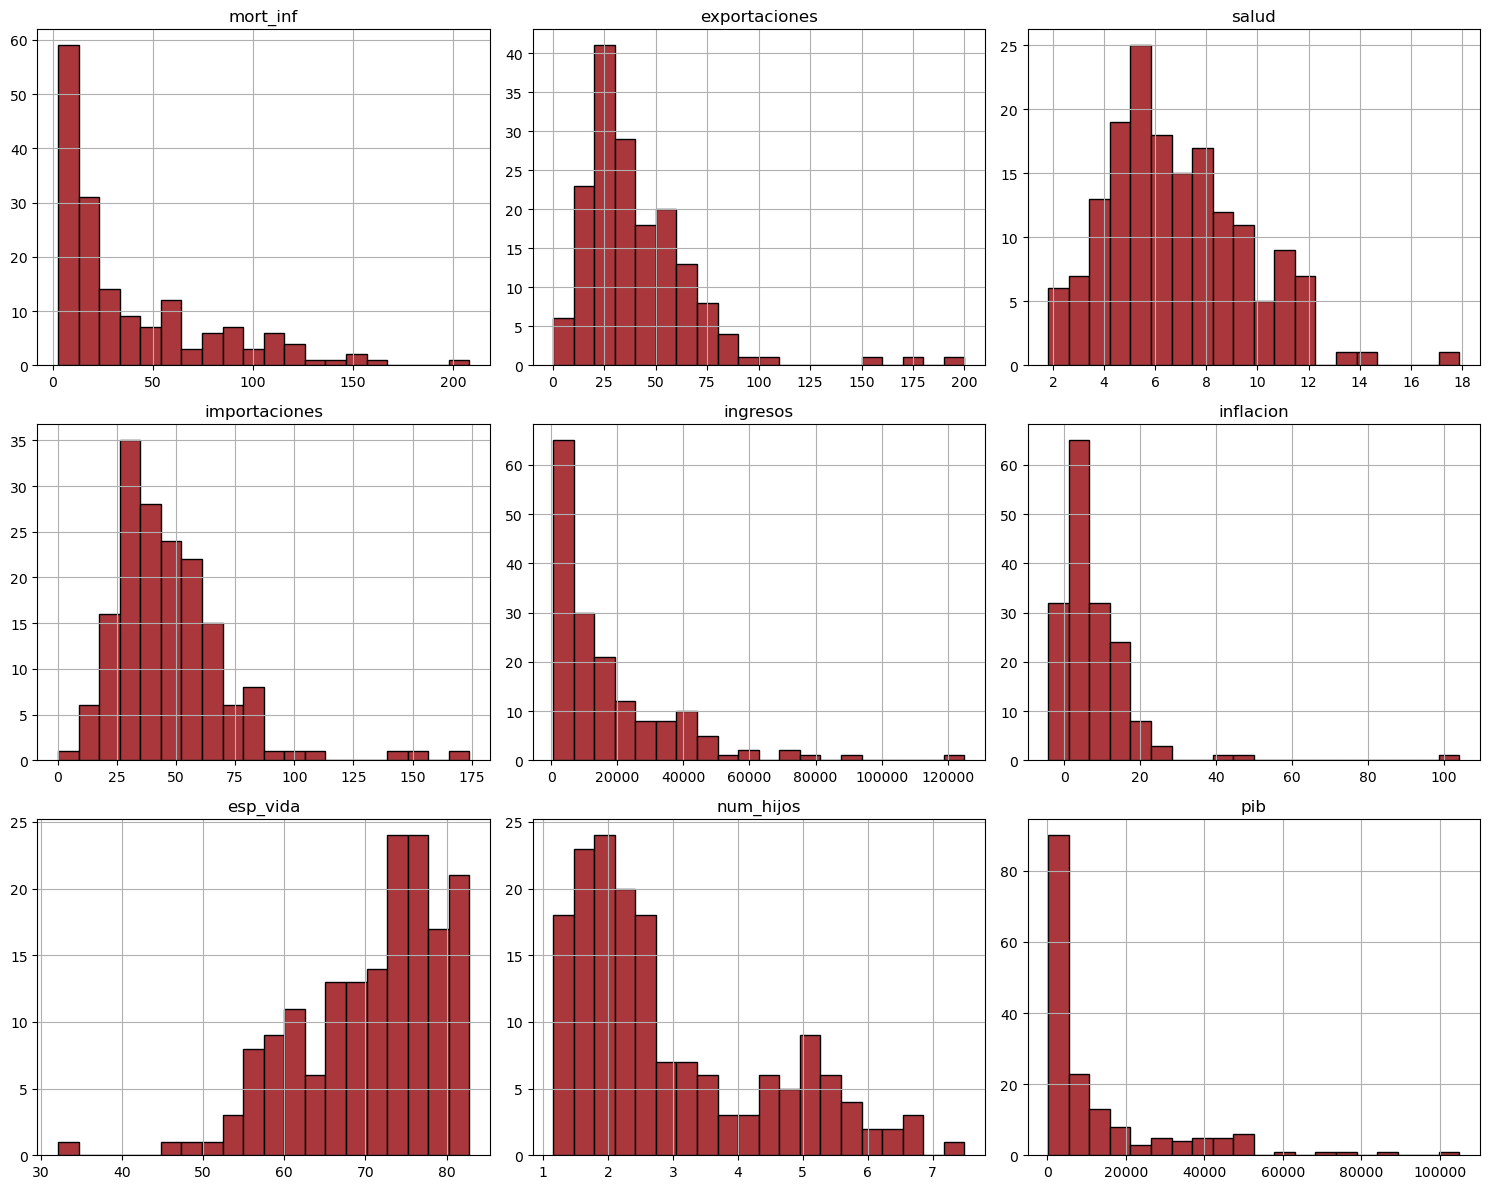

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribuciones de las variables numéricas
df.hist(figsize=(15, 12), bins=20, color="#A9373B", edgecolor="black")
plt.tight_layout()
plt.show()

**Conclusiones:**  Se puede ver a simple vista que casi todas las variables (menos 'num_hijos' talvez) tienen outliers. La mayoría de países tienen ingresos y un pib bajo, la esperanza de vida por lo general esta entre los 60 y 80 años y la distrubución de 'importaciones' y 'exportaciones' es muy similar (probablemente esten relacionadas).

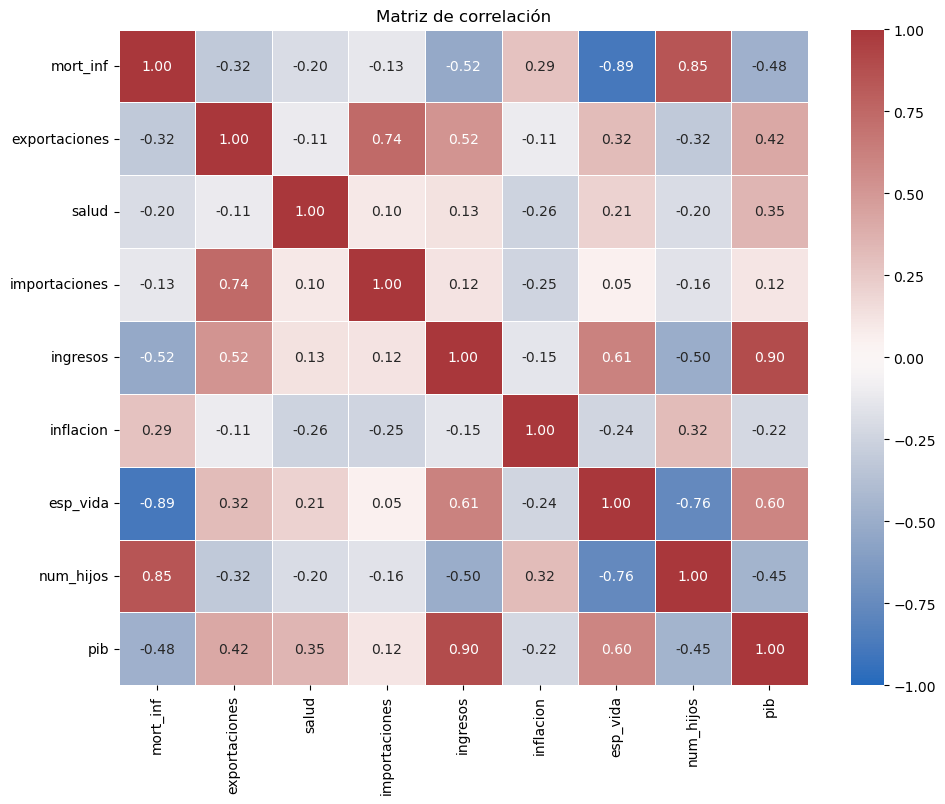

In [16]:
# Correlaciones entre variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="vlag", center=0, vmin=-1, vmax=1, fmt=".2f", linewidths=0.5)
plt.tight_layout()
plt.title("Matriz de correlación")
plt.show()

**Correlaciones fuertes:** 

* **Esperanza de Vida y Mortalidad Infantil:** Por lo general en países con una mayor mortalidad infantil la esperanza de vida es menor.
* **Esperanza de Vida y Número de Hijos:** En los países en donde las mujeres tienen más hijos, la esperanza de vida suele ser menor.
* **Esperanza de Vida y PIB:** En países con mayor PIB la esperanza de vida es mayor.
* **Ingresos y PIB:** Los países con un mayor PIB tienen ingresos más altos.
* **Ingresos y Esperanza de Vida:** En los países con mayores ingresos la esperanza de vida suele ser mayor.
* **Ingresos y Mortalidad Infantil:** Los países con mayores ingresos tienen una mortalizad infantil menor.
* **Exportaciones e Importaciones** Estas dos variables también tienen una fuerte correlación, lo que indica que los países con mayor número de importaciones también tienen altas exportaciones.

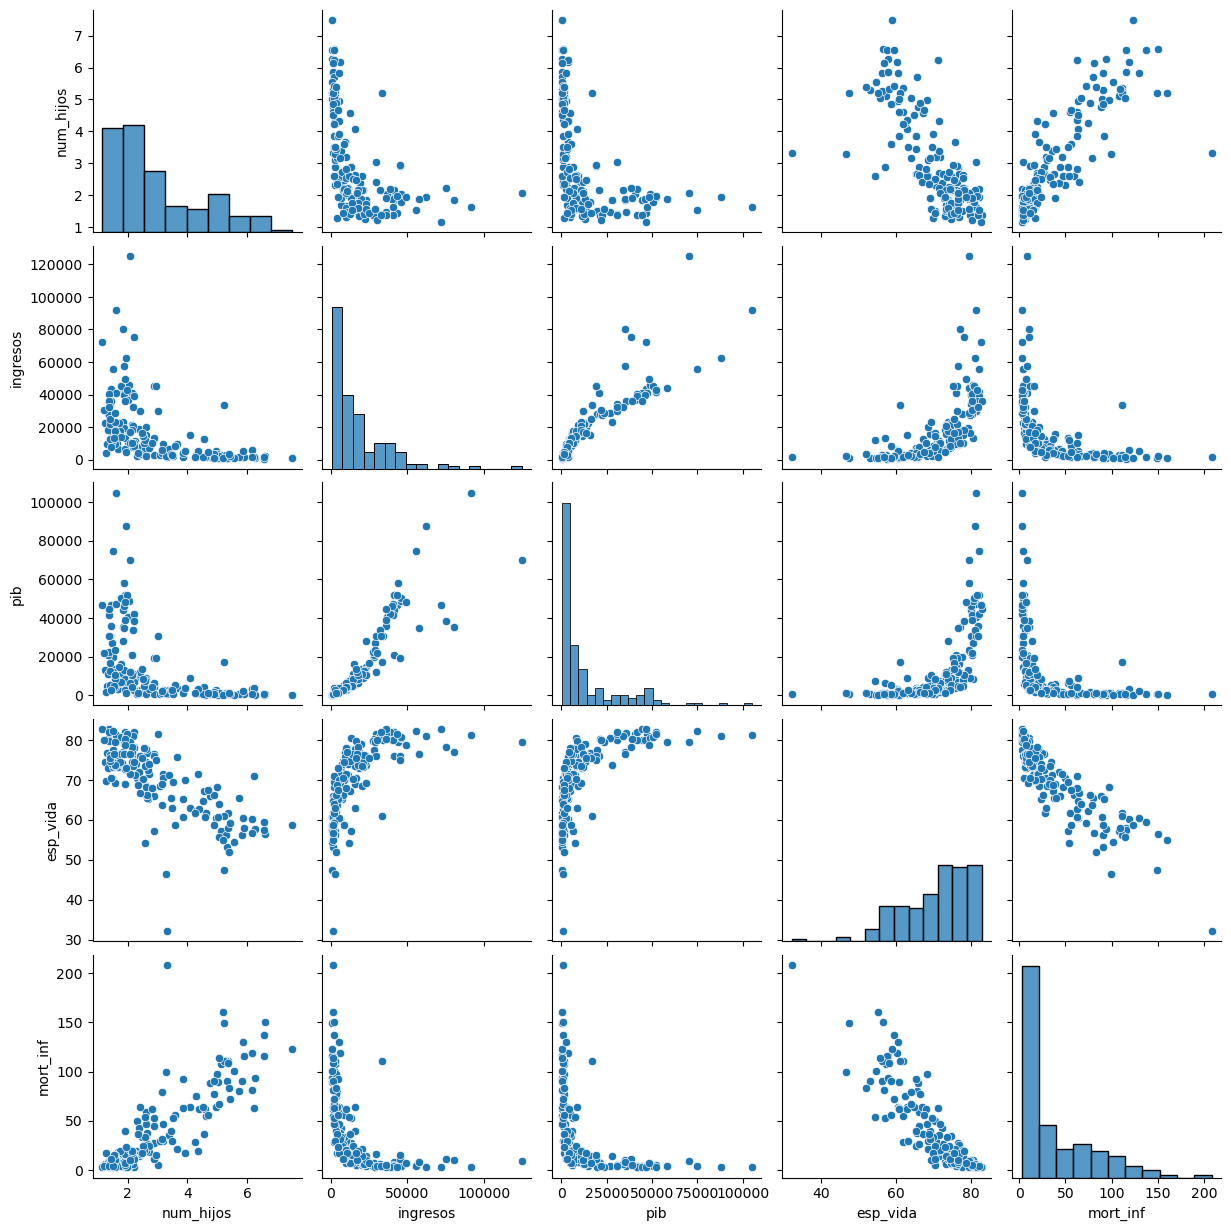

In [17]:
# Relaciones específicas
sns.pairplot(df, vars=["num_hijos", "ingresos", "pib", "esp_vida", "mort_inf"])
plt.show()

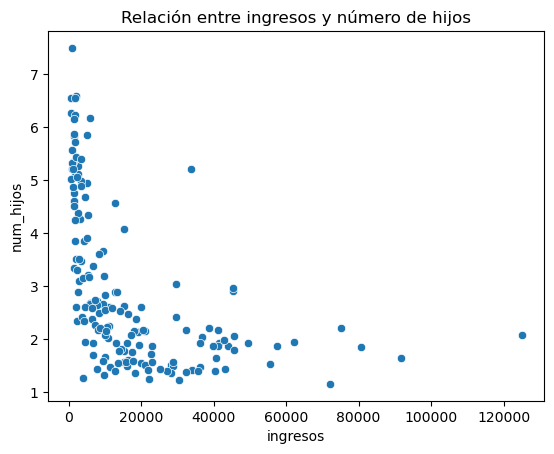

In [18]:
sns.scatterplot(data=df, x="ingresos", y="num_hijos")
plt.title("Relación entre ingresos y número de hijos")
plt.show()

**Conclusión:** Se ve claramente que los países con menores ingresos tienden a ser los que más hijos tienen. 

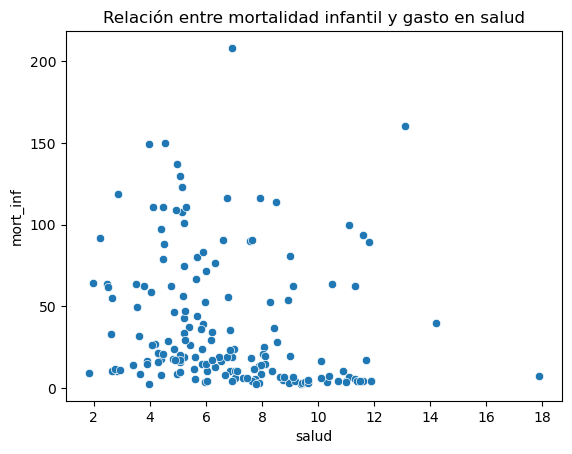

In [19]:
sns.scatterplot(data=df, x="salud", y="mort_inf")
plt.title("Relación entre mortalidad infantil y gasto en salud")
plt.show()

**Conclusión:** No se puede decir que un mayor gasto en salud implica una menor mortalidad infantil.

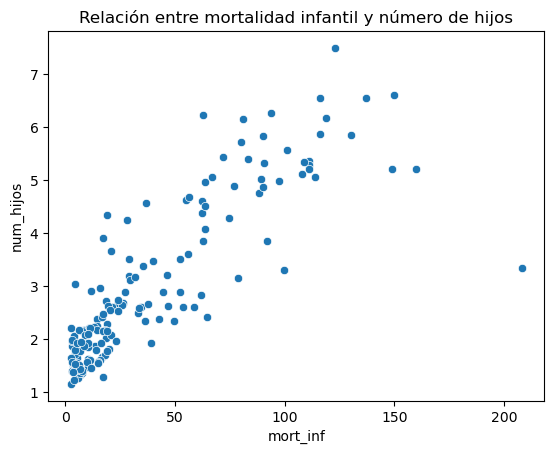

In [20]:
sns.scatterplot(data=df, x="mort_inf", y="num_hijos")
plt.title("Relación entre mortalidad infantil y número de hijos")
plt.show()

**Conclusión:** Con esta gráfica se puede ver que por lo general, a mayor número de hijos por mujer, la mortalidad infantil crece.

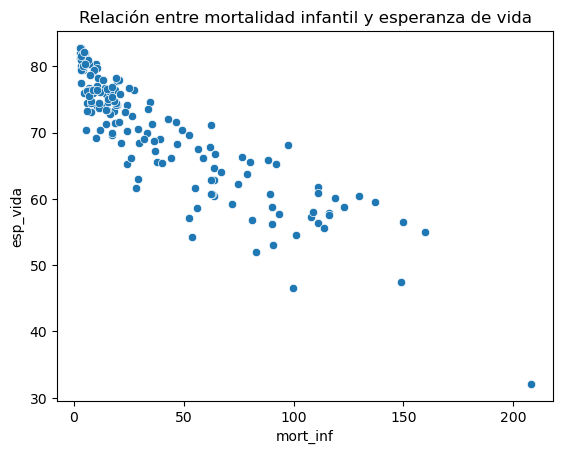

In [21]:
sns.scatterplot(data=df, x="mort_inf", y="esp_vida")
plt.title("Relación entre mortalidad infantil y esperanza de vida")
plt.show()

**Conclusiones:** Los países con una menor esperanza de vida suelen tener una mayor tasa de mortalidad infantil.

### 2.2 Preprocesado

In [22]:
# Crear un DF sin la columna país
df_numerico = df.drop(columns=["pais"])

In [23]:
# Escalado de los datos
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(df_numerico)

**Conclusiones:** En el preprocesado solo se elimina la columna 'pais', ya que es la única que no tiene infromación predictiva útil para el entrenamiento de los modelos.

## 3. Creación de los modelos, entrenamiento, predicciones y representación gráfica

### 3.1 K-Means

#### 3.1.1 Identificación del K ideal

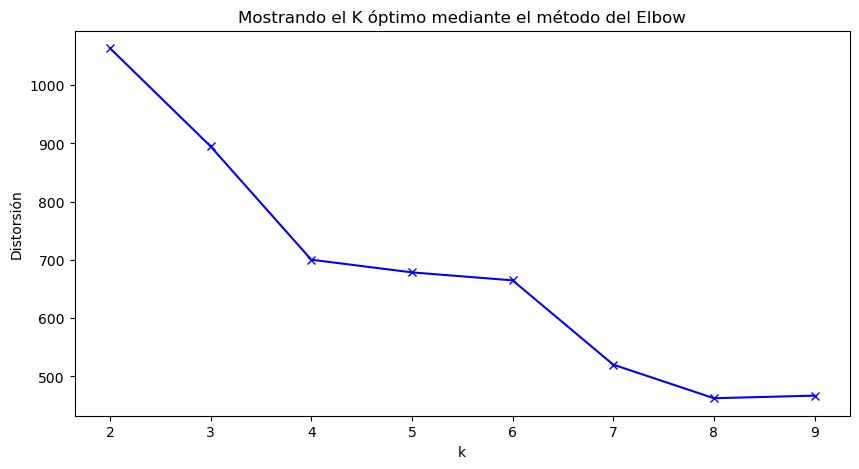

In [25]:
# Método elbow
from sklearn.cluster import KMeans

distortions = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init='auto')
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

# Representa gráficamente la evolución de la distorsión en función de K
plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distorsión')
plt.title('Mostrando el K óptimo mediante el método del Elbow')
plt.show()

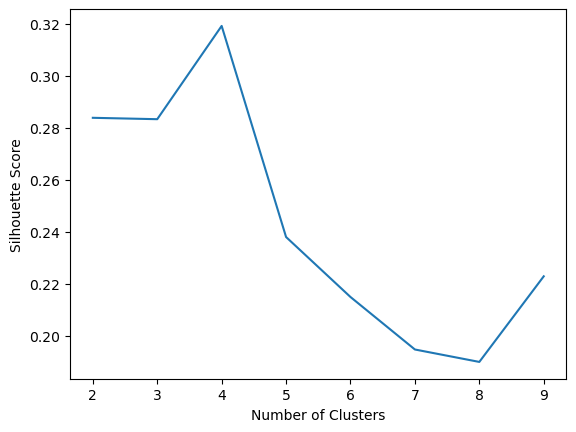

In [26]:
# Silhouette score
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score

scores = list()
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(X)
    scores.append(silhouette_score(X, kmeans.labels_, metric='euclidean'))
    del(kmeans)

plt.plot(list(range(2, 10)), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

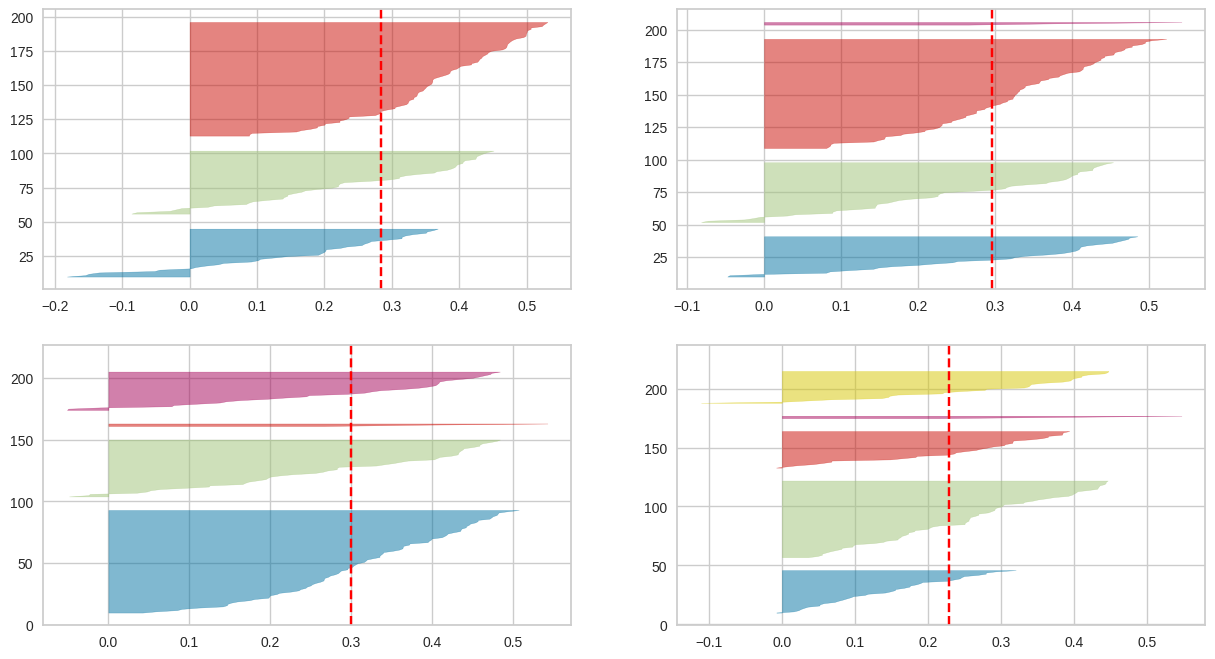

In [27]:
# Vista de los distintos Silhouette score en función de K
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [3, 4, 5, 6]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i-1, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

**Conclusión:** Luego de visualizar los 3 métodos para identificar el K ideal, se puede ver que pareciera estar entre 3 y 5, por lo que me quedaré con 4. 

### 3.1.2 Creación del modelo

In [28]:
# Números de clusters
k = 4 

In [29]:
# Creación del modelo
kmeans = KMeans(n_clusters=k, n_init='auto',init='k-means++' , random_state=30)

In [30]:
# Entrenamiento
kmeans_pred = kmeans.fit_predict(X)

In [31]:
# Agregar el cluster predicho al DF
df["cluster-kmeans"] = kmeans_pred

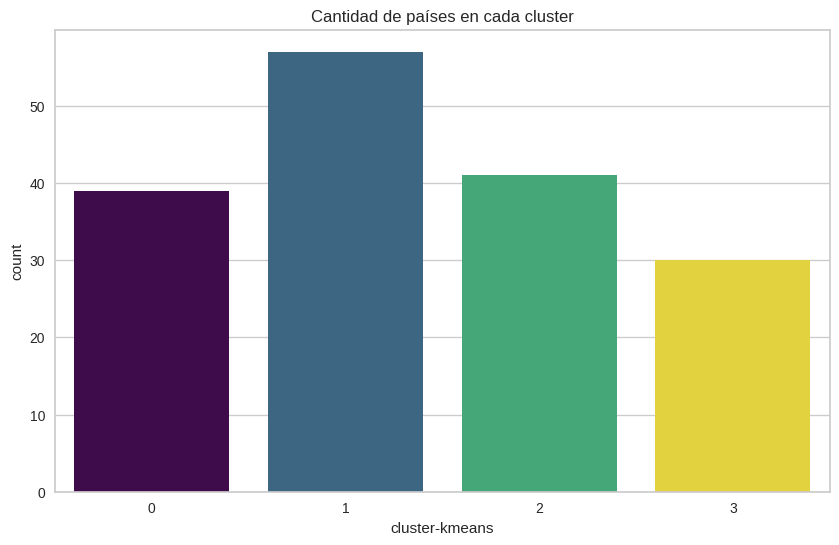

In [32]:
# Distribución de los clusters
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster-kmeans', data=df, hue='cluster-kmeans', palette='viridis', legend=False)
plt.title('Cantidad de países en cada cluster')
plt.show()

In [33]:
# Imprimir paises incluidos en cada cluster
for cluster_id in df['cluster-kmeans'].unique():
    print(f"\nPaíses en el Clúster {cluster_id}:")
    print(df[df['cluster-kmeans'] == cluster_id]['pais'].tolist())


Países en el Clúster 2:
['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Kenya', 'Kiribati', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Zambia']

Países en el Clúster 1:
['Albania', 'Antigua and Barbuda', 'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bosnia and Herzegovina', 'Bulgaria', 'Cambodia', 'Cape Verde', 'Chile', 'Costa Rica', 'Croatia', 'Czech Republic', 'El Salvador', 'Estonia', 'Fiji', 'Georgia', 'Grenada', 'Guyana', 'Hungary', 'Jordan', 'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Malta', 'Mauritius', 'Micrones

In [34]:
# Identidicar el cluster con países pobres
cluster_pobreza_kmeans = df.groupby('cluster-kmeans')[['ingresos', 'esp_vida', 'mort_inf', 'pib']].mean().sort_values(by='ingresos')
print(cluster_pobreza_kmeans)

                    ingresos   esp_vida   mort_inf           pib
cluster-kmeans                                                  
2                3488.609756  58.375610  97.221951   1783.658537
0               10515.641026  71.174359  33.853846   4996.358974
1               14874.035088  73.647368  16.452632   8612.736842
3               48740.000000  80.523333   4.896667  46870.000000


**Conclusión:** El grupo 2 sería el de los países más pobres, ya que tiene la media de ingresos, esperanza de vida y pib más baja de los 4, y la media de mortalidad infantil más alta.

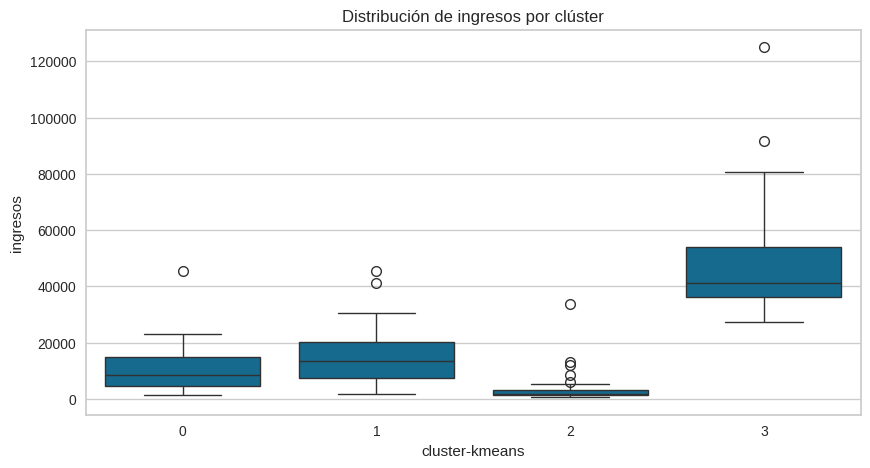

In [35]:
# Visualización de la distrubución de los ingresos según el cluster
plt.figure(figsize=(10,5))
sns.boxplot(x='cluster-kmeans', y='ingresos', data=df)
plt.title('Distribución de ingresos por clúster')
plt.show()

In [36]:
# Cantidad de países del cluster 2
num_paises_cluster_2 = df[df['cluster-kmeans'] == 2].shape[0]
print(f"El número de países en el Cluster 2 es: {num_paises_cluster_2}")

El número de países en el Cluster 2 es: 41


**Conclusiones:** El modelo de clasificación K-MEANS ha agrupado los países en 4 clusters, de los cuales el clúster 2 correspondería a los países más pobres. En este cluster hay 41 países: Afghanistan, Angola, Benin, Botswana, Burkina Faso, Burundi, Cameroon, Central African Republic, Chad, Comoros, Congo, Dem. Rep., Congo, Rep., Cote d'Ivoire, Equatorial Guinea, Gambia, Ghana, Guinea, Guinea-Bissau, Haiti, Kenya, Kiribati, Lesotho, Liberia, Madagascar, Malawi, Mali, Mauritania, Mozambique, Namibia, Niger, Nigeria, Rwanda, Senegal, Sierra Leone, South Africa, Sudan, Tanzania, Timor-Leste, Togo, Uganda, Zambia. 

### 3.2 Clústering Jerárquico

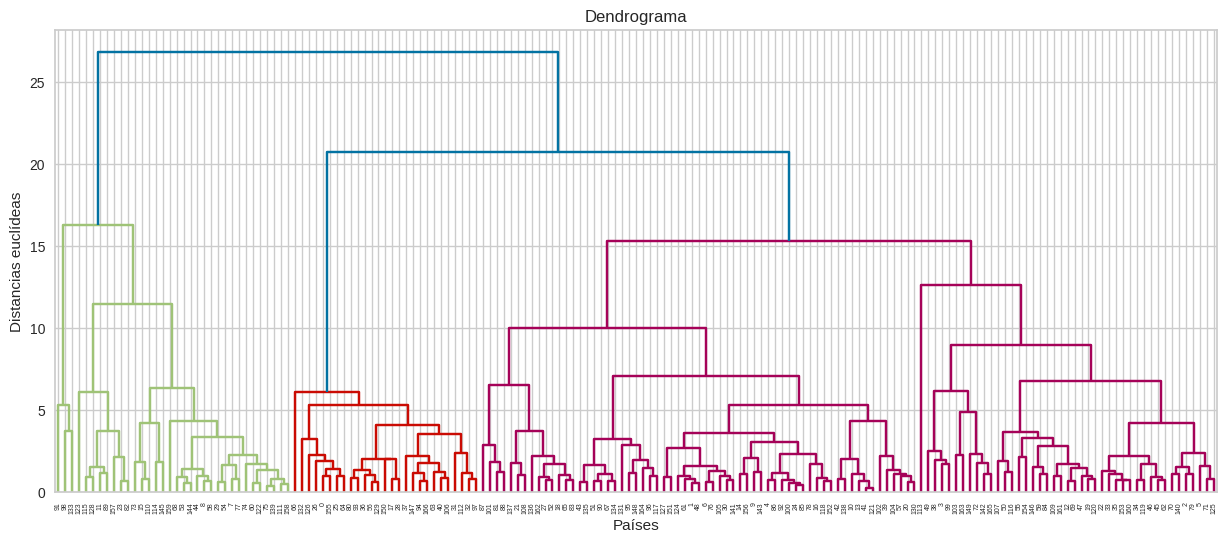

In [37]:
# Dendrograma
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,6))
plt.title('Dendrograma')
plt.xlabel('Países')
plt.ylabel('Distancias euclídeas')
plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()

**Conclusión:** Viendo el dendrograma no queda claro si el k ideal es 3 o 5, al igual que con K-Means. El modelo será entrenado con un k de 4. 

In [38]:
# Creación del modelo
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 4, metric='euclidean', linkage = 'ward')
hc_pred = hc.fit_predict(X)

In [39]:
# Agregar el cluster predicho al DF
df["cluster-hc"] = hc_pred

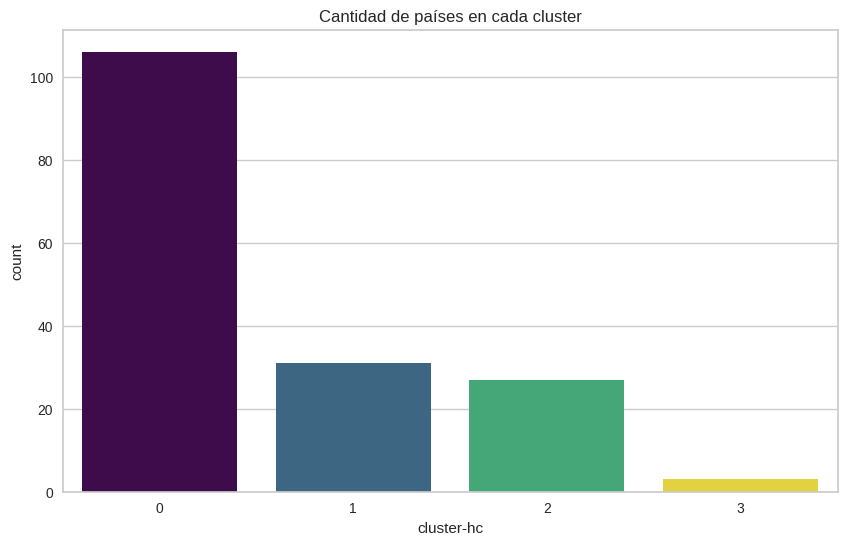

In [40]:
# Distribución de los clusters
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster-hc', data=df, hue='cluster-hc', palette='viridis', legend=False)
plt.title('Cantidad de países en cada cluster')
plt.show()

In [41]:
# Imprimir paises incluidos en cada cluster
for cluster_id in df['cluster-hc'].unique():
    print(f"\nPaíses en el Clúster {cluster_id}:")
    print(df[df['cluster-hc'] == cluster_id]['pais'].tolist())


Países en el Clúster 2:
['Afghanistan', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', "Cote d'Ivoire", 'Gambia', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Kenya', 'Madagascar', 'Malawi', 'Mali', 'Mozambique', 'Niger', 'Rwanda', 'Senegal', 'Sierra Leone', 'Tanzania', 'Togo', 'Uganda', 'Zambia']

Países en el Clúster 0:
['Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Congo, Rep.', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Gabon', 'Georgia', 'Ghana', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India', 'Indonesia', 'Iran', 'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan', 'Ki

In [42]:
# Identidicar el cluster con países pobres
cluster_pobreza_hc = df.groupby('cluster-hc')[['ingresos', 'esp_vida', 'mort_inf', 'pib']].mean().sort_values(by='ingresos')
print(cluster_pobreza_hc)

                ingresos   esp_vida    mort_inf           pib
cluster-hc                                                   
2            1589.740741  57.248148  105.070370    667.888889
0           11341.886792  70.921698   31.617925   6407.367925
1           45996.774194  79.841935    6.138710  41777.419355
3           64033.333333  81.433333    4.133333  57566.666667


**Conclusión:** En este modelo también el grupo 2 sería el de los países más pobres, ya que también tiene la media de ingresos, esperanza de vida y pib más baja de los 4, y la media de mortalidad infantil más alta.

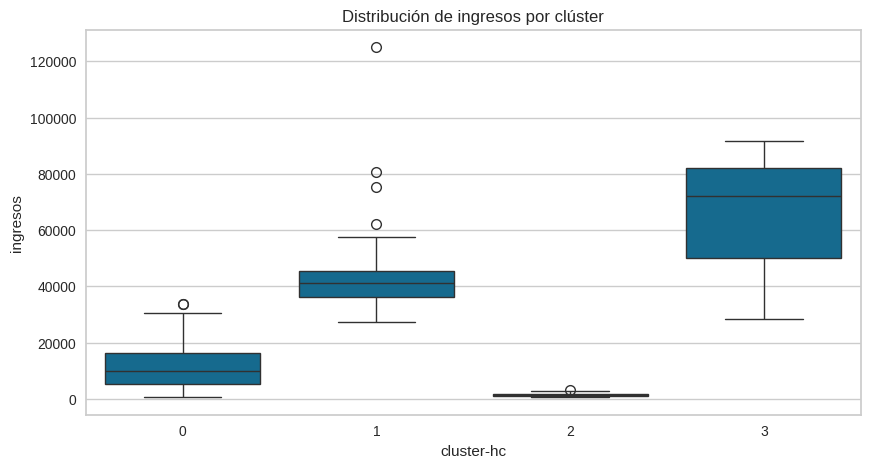

In [43]:
# Visualización de la distrubución de los ingresos según el cluster
plt.figure(figsize=(10,5))
sns.boxplot(x='cluster-hc', y='ingresos', data=df)
plt.title('Distribución de ingresos por clúster')
plt.show()

In [44]:
# Cantidad de países del cluster 2
num_paises_cluster_2 = df[df['cluster-hc'] == 2].shape[0]
print(f"El número de países en el Cluster 2 es: {num_paises_cluster_2}")

El número de países en el Cluster 2 es: 27


**Conclusión:** El modelo Clústering Jerárquico ha clusterizado los países en 4 grupos, de los cuales el grupo 2 es el que corresponde a los países más pobres. Este grupo esta conformado por 27 países, listados a continuación: Afghanistan, Benin, Burkina Faso, Burundi, Cameroon, Central African Republic, Chad, Comoros, Congo, Dem. Rep., Cote d'Ivoire, Gambia, Guinea, Guinea-Bissau, Haiti, Kenya, Madagascar, Malawi, Mali, Mozambique, Niger, Rwanda, Senegal, Sierra Leone, Tanzania, Togo, Uganda, Zambia. 

**He utilizado los dos modelos para poder compararlos y mi conclusión final es que el modelo de Clústering Jerárquico ha hecho una selección más acertada de los países más pobres. Fue capaz de dentificar un grupo más extremo y homogéneo de países con condiciones más precarias, mientras que K-Means generó clusters donde los valores de ingresos y PIB son menos diferenciados.**

In [45]:
# Comparación entre ambos modelos
print(cluster_pobreza_kmeans)
print(cluster_pobreza_hc)

                    ingresos   esp_vida   mort_inf           pib
cluster-kmeans                                                  
2                3488.609756  58.375610  97.221951   1783.658537
0               10515.641026  71.174359  33.853846   4996.358974
1               14874.035088  73.647368  16.452632   8612.736842
3               48740.000000  80.523333   4.896667  46870.000000
                ingresos   esp_vida    mort_inf           pib
cluster-hc                                                   
2            1589.740741  57.248148  105.070370    667.888889
0           11341.886792  70.921698   31.617925   6407.367925
1           45996.774194  79.841935    6.138710  41777.419355
3           64033.333333  81.433333    4.133333  57566.666667


## 4. PCA

In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
data_reduced = pca.fit_transform(X)

In [48]:
print(f"Luego de aplicar PCA el conjunto de datos paso a tener {data_reduced.shape[1]} features.")

Luego de aplicar PCA el conjunto de datos paso a tener 6 features.


### 4.1 Analisis de varianza explicada/definida

In [49]:
import numpy as np

pca.explained_variance_ratio_, np.sum(pca.explained_variance_ratio_) 

(array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
        0.02484235]),
 0.9701523224082289)

**Conclusión:** Se logra mantener una varianza del 97%

### 4.2 Análisis de tiempo de ejecución

#### K-MEANS

In [50]:
# Antes de aplicar PCA
%timeit -n1 -r1 kmeans.fit(X)

2.11 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [51]:
# Luego de aplicar PCA
%timeit -n1 -r1 kmeans.fit(data_reduced)

2.43 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


#### Clústering Jerárquico

In [52]:
# Antes de aplicar PCA
%timeit -n1 -r1 hc.fit(X)

960 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [53]:
# Luego de aplicar PCA
%timeit -n1 -r1 hc.fit(data_reduced)

1.26 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


**Conclusión:** En ninguno de los dos modelos se mejora el tiempo de ejecución.

### 4.3 Entrenamiento de modelos luego de aplicar PCA

#### K-MEANS

In [54]:
# Entrenamiento
kmeans_pred_pca = kmeans.fit_predict(data_reduced)

In [55]:
# Agregar el cluster predicho al DF
df["cluster-kmeans-pca"] = kmeans_pred_pca

In [56]:
# Identidicar el cluster con países pobres luego de aplicar PCA
cluster_pobreza_kmeans_pca = df.groupby('cluster-kmeans-pca')[['ingresos', 'esp_vida', 'mort_inf', 'pib']].mean().sort_values(by='ingresos')
print(cluster_pobreza_kmeans_pca)

# Indicadores antes de aplicar PCA
print(cluster_pobreza_kmeans)

                        ingresos   esp_vida   mort_inf           pib
cluster-kmeans-pca                                                  
2                    3539.844444  59.055556  95.106667   1766.711111
0                   12589.186047  72.616279  22.310465   6444.325581
1                   37948.148148  80.403704   4.544444  41481.481481
3                   66288.888889  78.822222   7.766667  45700.000000
                    ingresos   esp_vida   mort_inf           pib
cluster-kmeans                                                  
2                3488.609756  58.375610  97.221951   1783.658537
0               10515.641026  71.174359  33.853846   4996.358974
1               14874.035088  73.647368  16.452632   8612.736842
3               48740.000000  80.523333   4.896667  46870.000000


In [57]:
# Cantidad de países del cluster 2
num_paises_cluster_2 = df[df['cluster-kmeans-pca'] == 2].shape[0]
print(f"El número de países en el Cluster 2 es: {num_paises_cluster_2}")

El número de países en el Cluster 2 es: 45


**Conclusión:** En el entrenamiento antes de aplicar PCA, el clúster más pobre tiene ingresos y PIB más bajos y una mortalidad infantil más alta, lo que permite identificarlo claramente. Antes de aplicar PCA el grupo más pobre tenía 41 países y luego de aplicarlo han pasado a 45.

#### Clústering Jerárquico

In [58]:
# Entrenamiento
hc_pred_pca = hc.fit_predict(data_reduced)

In [59]:
# Agregar el cluster predicho al DF
df["cluster-hc-pca"] = hc_pred_pca

In [60]:
# Identidicar el cluster con países pobres luego de aplicar PCA
cluster_pobreza_hc_pca = df.groupby('cluster-hc-pca')[['ingresos', 'esp_vida', 'mort_inf', 'pib']].mean().sort_values(by='ingresos')
print(cluster_pobreza_hc_pca)

# Indicadores antes de aplicar PCA
print(cluster_pobreza_hc)

                    ingresos   esp_vida   mort_inf           pib
cluster-hc-pca                                                  
0                4159.490566  60.130189  86.741509   2120.339623
2               13158.148148  73.487654  19.749383   7475.753086
1               46160.000000  79.970000   6.056667  42480.000000
3               64033.333333  81.433333   4.133333  57566.666667
                ingresos   esp_vida    mort_inf           pib
cluster-hc                                                   
2            1589.740741  57.248148  105.070370    667.888889
0           11341.886792  70.921698   31.617925   6407.367925
1           45996.774194  79.841935    6.138710  41777.419355
3           64033.333333  81.433333    4.133333  57566.666667


In [61]:
# Cantidad de países del cluster 0
num_paises_cluster_0 = df[df['cluster-hc-pca'] == 0].shape[0]
print(f"El número de países en el Cluster 0 es: {num_paises_cluster_0}")

El número de países en el Cluster 0 es: 53


**Conclusión:** Entrenando el modelo de Clústering Jerárquico luego de aplicar PCA sobre los datos de entrenamiento, se puede ver como el modelo ha empeorado notablemente. Los países más pobres se mezclan con otros grupos y se ve claramente por sus elevados valores promedio de ingresos y PIB. Esto impide identificar con precisión a los países más necesitados, que en la versión sin PCA estaban claramente diferenciados.

**En ambos casos los resultados son desfavorables luego de aplicar PCA. Esto puede deberse a que por lo general PCA se utiliza en dataset con una alta dimensionalidad, en donde hay muchas variables correlacionadas. Si bien este dataset tiene variables correlacionadas no tiene una dimensionalidad tan grande como para que sea necesario aplicar PCA. El tiempo de ejecución tampoco fue mejorado por lo que mi conclusión final es que no, no tiene sentido para este caso aplicarlo.**

## 5. Conclusiones

Tras aplicar técnicas de agrupación de datos mediante clustering jerárquico, fueron identificados los países con los mayores índices de pobreza. Son 27 países y se muestran a continuación:

In [66]:
paisesPobres = df[df['cluster-hc'] == 2]
paisesPobres = paisesPobres.drop(columns= ['cluster-kmeans', 'cluster-kmeans-pca', 'cluster-hc-pca'])
display(paisesPobres)

,pais,mort_inf,exportaciones,salud,importaciones,ingresos,inflacion,esp_vida,num_hijos,pib,cluster-hc
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,2
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,2
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,2
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,2
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,2
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,2
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,2
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,2
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,2
40,Cote d'Ivoire,111.0,50.60,5.30,43.3,2690,5.390,56.3,5.27,1220,2


Estos países representan el 16.2% de los países del mundo analizados, pero concentran los peores indicadores socioeconómicos.Tienen ingresos extremadamente bajos, una alta tasa de mortalidad infantil y una baja esperanza de vida. Estos factores reflejan condiciones de vida críticas y la necesidad de mayor inversión en sectores clave como educación, salud e infraestructura.